<img align="center" width="12%" style="padding-right:10px;" src="../Images/Ccom.png">

# Lab A Step 2: Positioning Data<a href="https://piazza.com/class/jzvaaav18cf2j7"><img src="../Images/help.png"  title="Ask questions on Piazza.com" align="right" width="10%" alt="Piazza.com\"></a><br><br> 

In this Notebook you will update the classes for the Integrated Seabed Mapping Systems course Lab A assignment. The updates consists of adding draw methods to the classes that allow the data contained within class instances to be drawn in a standardized fashion. 

All the data in the classes will be drawn using Cartesian coordinates. This implies that a transformation is needed for the navigation data contained in the `Position` class, as it currently stores the position in latitudes and longitudes, which are curvilinear coordinates.

You have not yet encountered Python plotting methods, this is a gentle introduction


---

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import numpy as np

sys.path.append(os.getcwd())  # add the current folder to the list of paths where Python looks for modules 

## 2.0 Initialization

In the code cell below add code that 

- from mycode imports the `Positions` class
- Gets the absolute path `abs_path` to the current directory
- Creates a `positions` object of class `Position` and read the file 'Lab_A_GNSS.txt' contained in the 'Data' directory into it


In [2]:
import import_ipynb
import os.path
import matplotlib as plt
from mycode.position import Position
from datetime import datetime, timezone

# get the absolute path to the current directory

abs_path=os.path.abspath(os.path.curdir)

# Instantiate a Position object and read data into it 

positions=Position()
positions.read_jhc_file(abs_path+'/Data/Lab_A_GNSS.txt')



Opening GNSS data file:/home/jupyter-semmed/ESCI_OE_774_874/Lab_A/Data/Lab_A_GNSS.txt


---

## 2.1 Plot the Position Data

We want to plot the data contained in the `Position` class object `positions`. This object currently holds a list of epochs with for each epoch a latitude, longitude and orth_height value. In ocean mapping positioning time series often represent the path along which a vessel navigated, so it will be useful if we can draw the navigated path in a map. It is often helpful if the large scale detailed map is accompanied by a small scale map indicating the general location of the data.

In ocean mapping we use map **projections** to transform the curvilinear geodetic latitudes and longitudes to Cartesian map coordinates. The `cartopy` package makes use of the commonly used `PROJ` library. `PROJ` is an open source library that supports hundreds of cartographic projections, as well as other geodetic transformations. Here You will use `cartopy` to plot the geodetic coordinates in both an **Orthographic** and a **Universal Transverse Mercator (UTM)** projection using  projection algorithms contained in the PROJ library.

### 2.1.0 Import the geo-referencing modules

Add the line `import cartopy.crs as ccrs`, `import cartopy`, and `import pyproj as proj` to the top of your `position` class definition file. These modules will give you the ability to deal with georeferenced data - what that is will be explained throughout this notebook.

### 2.1.1 Add the `draw` method to the `Position` class

For this method we will need to use matplotlib, make sure that `matplotlib` is imported as plt in your Position class definition.

 Add the `draw` method to the `Position` class; this function should take the argument `self`.  When called the method should print the line "Drawing Position Data using the the `Orthographic` and `UTM` projections". For now we will have the class draw two maps: one using a **Orthographic** projection and the other using a **Universal Transverse Mercator (UTM)** projection.

Drawing Positioning Data
55


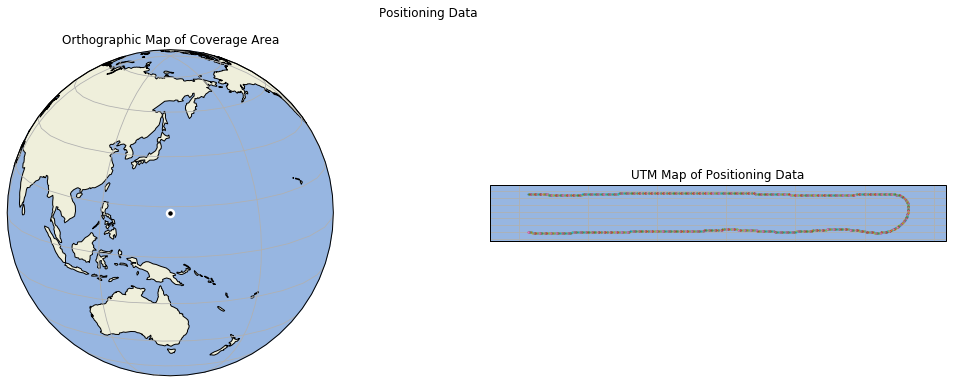

In [3]:
positions.draw()

# 3 Geodetic Referencing

Before we go on we need to discuss positioning a little.

<img align="center" width="50%" style="padding-right:10px;" src="../Images/GeoidEllipsoid.png">

In LAB_A_Step 1 we created the method `read_jhc_file()` which we used to read the positioning data. However, the positioning data is useless without knowing what the positioning is relative to. Clearly we want to position ourselves relative to the Earth, which means that we need some geometrical description of it. We should not use the topography of the Earth as the model, otherwise both *Mount Everest* and the *Marianas Trench* would have an elevation of 0 m. Commonly people refer to elevations relative to sea level - however this is problematic as not the entire Earth is covered by an ocean. In reality a proxy is used to Mean Sea Level (**MSL**), namely an equipotential gravity field that is a best fit to MSL. This equipotential field is known as the **Geoid** which in the figure above is represented in blue. 

For vertical positioning the geoid is a good datum as the distance from it predicts the potential energy of an object of given mass through $E_{pot}=mgh$, where $h$ is the orthogonal distance from the surface of the geoid. 
The height data in your data file are relative to the **EGM08** geoid model. 

For calculating distances along the surface of the geoid model ambiguities may occur due to its irregular nature, thus we usually use a simple geometric shape that approximates the geoid and on which we can define distances and horizontal coordinates uniquely, such a model is shown in orange in the figure above. 

<img align="center" width="50%" style="padding-right:10px;" src="../Images/Ellipsoid.png">

In this case the data is relative to a **geodetic datum**, consisting of an oblate ellipse of revolution - that is: a 2D ellipse that is rotated around its semi-minor axis, as shown in the figure above. The origin of these models sit on the modeled center of gravity of the Earth, the semi-minor axis is aligned to the Earth's rotational axis and the semi-major axis sweeps the equatorial plane. 

There are many possible geodetic datums that may be used. Historically we used ellipsoid that locally best fit the geoid, but with the advent of Global Navigation Satellite Systems (**GNSS**) a shift towards the use of global datums has taken place. The **GPS** system uses the **WGS84** geodetic datum, which is what coordinates in your data file are relative to.

<img align="center" width="80%" style="padding-right:10px;" src="../Images/Geodetic_LL.png">

The coordinates given to you are knowns as **geodetic latitudes and longitudes**, that is: latitudes and longitudes relative to a geodetic datum. First we will have to define what meridians and parallels are before we can express what latitudes and longitudes are.

The poles of the geoid are where the semi-minor axes intersect the ellipsoid. A Meridian is then the intersection of the plane containing both the poles and a point of interest. This plane is inherently orthogonal to the equatorial plane and the intersection with the ellipsoid is an ellipse referred to as a meridian. All points in this plane on one side of the semi-minor axis are said to have the same longitude, all points on the other side are offset by $180^{\circ}$. The difference in longitude between two points is then the angle in the equatorial plane between the meridians associated to them. To provide a useful datum a zero meridian must then be chosen, which goes through a point near the **Greenwich** Royal observatory in England. The figure above left then illustrates longitude $\lambda$ relative to the Greenwich meridian $\lambda_0$. 

All points in an equidistant plane from the equator are said to have the same latitude. There are many 'flavors' of latitude, but the one that is most commonly used for positioning is named **geodetic latitude**. Geodetic latitude is defined by the line tangent to the meridian associated to a point of interest. Geodetic latitude $\varphi$ is then the angle between the line orthogonal to the tangent and the equatorial plane $\varphi_0$, as shown in the figure above on the right

## 3.0 Set the reference ellipsoid and geoid

In the text file containing the coordinates no meta-data indicating the georeferencing parameters was included. In this case we are using orthometric heights relative to EGM08, and geodetic latitudes and longitudes relative to WGS84. <br>

<img align="left" width="6%" style="padding-right:10px;" src="../Images/test.png"><br>
Update your `read_jhc_file()` method for the Position class to set the metadata parameters for `geoid_name`, `ellipsoid_name`, and `height_relative_to` (as the heights are orthometric this should be set to "geoid")
<br><br>


____
# 4 Projections

A problem that we encounter is that latitudes and longitudes are curvilinear, meaning that a given change in coordinates does not represent the same distance depending on where we are. The reference ellipsoid is what is referred to as a nonzero Gaussian surface, that is it is not possible to draw features on the ellipsoid on a flat mapping plane without inducing distortion. To draw geographic data then we need to transform all the geodetic coordinates to map coordinates using a **projection**, that is a function to systematically map all coordinates, Projections arean extensive subject that we will not delve into here, other than to say that we typically choose a projection based on its distortion properties. There, however may be other reasons too, for example aesthetic ones. In this case we will use an `Orthographic` projection for the reason that it provides an easy to understand global view of a location, and a UTM projection for the reason that it is the predominant used projection for ocean mapping at middle latitudes as it is conformal (it preserves angles in a local space) and distorts relatively little in distance in area if used properly.  

___
## 4.0 Determine the central latitude and longitude of the data in the Position object

For the projections of both maps you need to determine the central longitude $\lambda_{central}$ and central latitude $\varphi_{central}$:

$$\lambda_{central}=\frac{max(\lambda)+min(\lambda)}{2}$$

$$\varphi_{central}=\frac{max(\varphi)+min(\varphi)}{2}$$

Create the `Position.draw()` method that assigns the value of $\varphi_{central}$ to a `local variable`  called `central_lat` (that is use central_lat **not** self.central_lat - this way the variable only exists while the method is being executed and is considered `local` to the method). You can use the imported `numpy` methods np.max() and np.min() for this purpose.

Then add a variable called `central_lon` and assign it the value $\lambda_{central}$.



## 4.1 Create a figure and a title

Add a `figure` object called `fig` of size 18x6 to the `Position.draw()` method. We want to give the figure the **supertitle** 'Positiong Data Plots'. use the `figure.suptitle()` method to achieve this.  

## 4.2 Create an **Orthographic** Coordinate Reference System (Orthographic CRS)

The subject of map projections is beyond the scope of this lab, suffice it to say that Orthographic projections depict Earth similarly to how you would see it from space and it is thus easily interpreted by many.

To plot the geodetic latitudes and longitudes in the Cartesian coordinates used by the `matplotlib` `plot` method we will need to define a reference system that allows for the transformation of geodetic coordinates into Orthographic Cartesian coordinates. The `plot` method can then be used this system to create an Orthographic map using geodetic coordinates.

In this case we want to draw a map of the world as seen from directly above the point $(\varphi_{central},\lambda_{central})$. To create a coordinate reference system object named `crs_ortho` use the `Orthographic()` method contained in `cartopy.crs`. Thus you may create `crs_ortho` by calling `ccrs.Orthographic()`. The first argument is then `central_lon` and the second is `central_lat`. For all other options we will accept the default argument values. 

## 4.3 Plot the Orthographic map

We want to create two maps in a single row of maps. The map on the left will be the Orthographic map. To hold the map on the left create a `subplot` of name `ax1` and provide the argument `projection=crs_ortho`. Providing the coordinate reference system leads to the plotting functions transforming the input coordinates to the right location for the map projection used.

Make sure that the full extent of the globe is shown (as would be visible from a vantage point in space) by setting the extents of the plot axes. The `set_global` method provided by `matplotlib` sets the axes to the limit of the projection. Thus adding the line `ax1.set_global()` will create the desired result. 

## 4.4 Add oceans, land and graticule

`Matplotlib` provides the `add_feature()` method for adding data of interest. `Cartopy` contains several commonly used data sets in a 'feature' library. Two of these data sets are `OCEANS` and `LAND`. The oceans will by default be colored blue and land will be colored yellow. You may draw the oceans to the subplot ax1 by adding the line  `ax1.add_feature(cartopy.feature.OCEAN)`. Also add the land (using `cartopy.feature.LAND`), but make sure that the edges of the land are drawn in black by adding the argument `edgecolor='black'` in your call to `add_feature`.

Now that the oceans and land-masses have been plotted you should overlay the subplot `ax1` with gridlines(). Use the `gridlines()` method for this purpose, using its default behavior i.e., do not provide any arguments.

## 4.5 Plot the central point  $(\varphi_{central},\lambda_{central})$ and title

Add the title to subplot `ax1` by using the `set_title()` method. The title should be 'Coverage Area'.

Finally! You are now ready to add some data specific to the survey to the map. We want to add a single round marker (`marker='o'`) of size 7 (` markersize=7.0`) that is black (`markerfacecolor='black'`) with an edge of width 2.5 (`markeredgewidth=2.5`) that is white (`markeredgecolor='white'`) to the plot. We want achieve this by using the matplotlib method `plot()`. We want to plot the marker at the central point  $(\varphi_{central},\lambda_{central})$ of the survey using `central_lon` as the x-coordinate and `central_lat` as the y coordinate. Since these coordinates are given in geodetic coordinates we need to provide the `plot()` method with the crs so that they may be transformed to Cartesian coordinates; this is achieved by adding the argument `transform=crs_ortho` i.e., `plt.plot(...,transform=crs_ortho)`. 


## 4.6 Create an **UTM** Coordinate Reference System

In the field of ocean mapping UTM projections are often used because they preserve any angle on the ellipsoid in the projection plane (UTM projections are **conformal**) and they distort distances relative little if used appropriately. The reason that the coordinates are projected onto a UTM projection plane is generally not for visualization purposes, but rather to allow for geometric calculations using the **isometric** Cartesian UTM coordinates rather than the **curvilinear** geodetic coordinates i.e., we may use pythogoras to calculate the distance between two points and use plane trigonometry to deal with angles and distances in triangles. As long as the UTM coordinates are used appropriately the distortions induced by using the transformed coordinates are relatively small. Although there certainly are other transformations available that would achieve the same, UTM projections are popular because they are widely supported by mapping software and well understood by mapping professionals.


$$zone_\lambda=floor \Bigg( \frac{\lambda+180}{6}modulo(60)+1 \Bigg) $$

UTM projections are used for latitudes from 80° South to 84° North. There are actually 120 UTM projections! There are these many to minimize the distortion in a UTM map for any region in particular. There are 60 longitude **zones** $zone_\lambda$; each zone being 6° of longitude in width. The longitude zones are numbered sequentially with zone 1 covering -180° to -174° E and zone 60 covering 174° to 180° E. Each longitude zone is then divided in a Southern ('S') and a Northern ('N') section with the equator being the boundary between the two. For example, the location of Portsmouth, NH is approx 43° N, 70° W, which puts it in UTM zone 19N.

Geometric distortion increases rapidly for data outside a zone. It is therefore best-practice to ensure that data outside a zone is not projected using the projection parameters for that zone. However, know that this is routinely ignored for data at the edges of zones when they do not significantly exceed the zone boundaries.

In this case we want to draw a map of the survey area using a UTM projection using the UTM zone containing  the central point  $(\varphi_{central},\lambda_{central})$. 

 - Add a local variable called `zone_number` and assign it the longitude zone number for `central_lon`. The modulo operator in the equation for $zone_\lambda$ given above ensures that the right zone is returned when longitudes in the Western Hemisphere are reported as positive numbers e.g.: $\lambda=-70==\lambda=290\Rightarrow zone_\lambda=19$. <br><br>

 - Add a local variable `southern_hemisphere` and sets its value to `True` if the central latitude is located in the Southern hemisphere or false if it is on the Northern hemisphere
 
  - create crs_utm by calling ccrs.UTM(). The first argument to provide is `zone=zone_number` and the second argument is `southern_hemisphere=southern_hemisphere`

## 4.7 Plot the UTM map

You will now create the second map in the single row of two maps. The map on the right will be the UTM map. To hold the map on the right create a `subplot` of name `ax2` and provide the argument `projection=crs_utm`. 

        # Set display limits based on the extend of the geodetic coordinates in this object
        e_buffer=(np.max(self.longitudes)-np.min(self.longitudes))/10
        n_buffer=(np.max(self.latitudes)-np.min(self.latitudes))/5
        ax2.set_extent((np.min(self.longitudes)-e_buffer, np.max(self.longitudes)+e_buffer, np.min(
            self.latitudes)-n_buffer, np.max(self.latitudes)+n_buffer), crs=crs_utm)

Make sure that the full extent of the data is shown in the UTM by setting the extents of the plot axes of `ax2` as hown above. The `set_extent()` method provided by `matplotlib` sets the axes to the limit given by the arguments provided to it. In this case we know the geodetic coordinates of the survey so we want to use the extent of the longitudes to provide the x-axis limits and the extent of the latitudes to set the y-axis limits. The `set_extent()` method of the `ax2` object then needs to be called with the arguments: $min(\lambda), max(\lambda), min(\varphi), max(\varphi)$ and `crs=crs_utm`. In our case I have added some buffers making that all the positions are shown well within the plot boundaries.

## 4.8 Add oceans, land and graticule

To make the UTM map on the right appear similarto the Orthographic map on the left add the `OCEANS` and `LAND`. features in the same manner. Also overlay the subplot `ax2` with gridlines.

## 4.9 Plot the positions and title

Add the title to subplot `ax2` by using the `set_title()` method. The title should be 'UTM Map of Positioning Data'.

You are now ready to add the position data to the map. To iterate through all the coordinates contained in the object use the following for loop defined by `for lon, lat in zip(self.longitudes, self.latitudes):`. For each point we want to add a single point marker (`marker='.'`) of size 2 (` markersize=2.0`) that is black (`markerfacecolor='black'`) to the plot. You want to plot each set of coordinates  $(\varphi,\lambda)$ of the survey using `lon` as the x-coordinate and `lat` as the y coordinate. Since these coordinates are given in geodetic coordinates we need to provide the `plot()` method with the crs so that they may be transformed to Cartesian coordinates; this is acieved by adding the argument `transform=crs_utm`. 

## 4.10 Display the Maps

At the end of the `Position.draw()` method add the line plt.show() which will cause the `ax1` and `ax2` objects to draw themselves on the screen in the area defined by `fig`. 

***
<img align="left" width="6%" style="padding-right:10px;" src="../Images/test.png">

## 4.11 Piazza

On Piazza create or contribute to a discussion regarding map projections. Use an internet search engine to identify a map projection that you like and post when and why you would use that projection to represent geographic data. 

___

# 5 Projected coordinates

In step 4 we made use of the capability of matplotlib to plot data given a `CRS`, which is very convenient. However, as we will see in later steps of LAB A it is also useful to perform calculations with projected coordinates, as discussed in step 4.3. This is so common that we will use the `proj_pos` numpy array to hold the projected coordinates and have the proj_str in the meta data represent the projection used to transform the geodetic coordinates to projected coordinates.

____
# 5.0 Add Projection Method

In your class definition add the method `carto_project()`. The method should take the arguments: `self`, `projection_name`, and `z_reference` representing the class object, the name of the projection, and the type of height coordinates respectively. 

    +proj=utm +zone=19 +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs

The `carto_project()` method will make use of the functionality of the `Proj` module. This module implements the transformation geospatial coordinates between CRSs and is used by the cartopy module that you have seen in the previous steps in this lab. For projecting data using proj we create a proj object that we then feed a string containing the properties of the projection that we want to use i.e., we need to create a string that is descriptive of the projection, such as the one shown above. In this case the string sets the projection to a UTM projection for zone 19 North, using the WGS84 geodetic datum for both input and output, and meters as the unit for the output coordinates.  

For now we will keep the method really simple and just allow the `UTM` projection and orthometric heights (heights relative to the geoid).


## 5.1 Test the Projection 

        # Test whether projection_name is a string

        if not isinstance(projection_name, str):
            raise RuntimeError(
                'Position.project(): argument `projection` must be of type str')
                
        # Keep a list of projection that are implemented in this function
        implemented_projections = list()
        implemented_projections.append('utm')

        # Raise an error of a non implemented projection is asked for
        if projection_name.lower() not in implemented_projections:
            raise RuntimeError(
                'Position.project(): The projection `' + projection_name + '` is not yet implemented')
                
         if projection_name.lower() == 'utm':
                
In your `carto_project()` add the lines given above below the method definition. This will ensure that the argument `projection_name` is a string and that its contents, when converted to lower case, are utm. Later we can add modify this method by adding other projections, but for now we will just implement **UTM**.
 
 
## 5.1 Create Projection String
 
Below the if projection_name.lower() == 'utm': statement add the code `proj_str = '+proj=utm'`. This is the start of the string that will tell a Proj object to use the UTM projection.
 

## 5.2 Determine Central Latitude and Longitude 

Determine central latitude and longitude in a fashion similar to step 4.3 - make sure that it is given in degrees!


## 5.3 Determine the UTM Zone Number

Determine the UTM zone as described in step 4.3 and append the `proj_str` with the string  ' +zone=' and the string representing the zone number


## 5.4 Determine the Hemisphere

Determine whether the central latitude is on the Northern or Southern hemisphere and append the `proj_str` with ' +north' or ' +south'.


## 5.5 Set the Geodetic Datum for the input coordinates

Append the `proj_str` with the string ' +ellps=' and then the string contained in `self.metadata["ellipsoid_name"]`. Note that if you do not have the right ellipsoid set in the meta data this is where things go wrong.


## 5.6 Set the Geodetic Datum for the output coordinates

Append the `proj_str` with the string ' +datum=' and then the string contained in `self.metadata["ellipsoid_name"]`. Note that if you want  to do a data transformation this will implement it! You may even transform between datums without projecting the data! This makes the Proj library extremely powerful for geospatial work and explains its popularity.


## 5.7 Set the Units for the output coordinates

We want the output coordinates to be meters, thus append `proj_str` with the string ' +units=m'


## 5.8 Prevent Proj default behavior

Proj has a number of default behaviors that we do not want, to disable the default behavior add ' +no_defs' to 'proj_str'

## 5.9 Save the Projection Metadata

Update the value belonging the metadata `proj_str` key of the position class to equal the `proj_str` that you just created. This will allow users of the projected data to know how they were created.


## 5.10 Create a pyproj object

To perform the projection we will create an object `proj_obj` using the expression  `proj_obj = proj.Proj(proj_str)`. This object now has everything that is needed to perform the projection of our geographic coordinates to projected UTM coordinates


## 5.11 Calculate the Easting and Northings

The coordinates in many projections including UTM are known as **Eastings and Northings**. Eastings are in the Eastward direction of the mapping plane whereas Northings are in the northward direction. Please realize points with an equal Northing generally **do not** have the same latitude, and similarly points of equal Easting do not have the same longitude!

    E, N = proj_obj(self.longitudes, self.latitudes)
    
The projection of the coordinates is simply performed by the line above - copy it and add it to your code


## 5.12 Create a Matrix of Positions as 3D Row vectors

We can now populate the `position.proj_pos` variable. The first row should hold the contents of E as an numpy array, the second row the contents of N, and the third the contents of the list position.heights.


___
# Testing, Testing

If you have done everything right the code cell below should produce the following output

    (3, 1397)
    392719.337 1764811.754 28.895


In [20]:
positions.carto_project('utm','ortho')

print( positions.proj_pos.shape)
print( '%.3f %.3f %.3f' % (positions.proj_pos[0,0],positions.proj_pos[1,0],positions.proj_pos[2,0]))


(3, 1397)
392719.337 1764811.754 28.895


<img align="left" width="5%" style="padding-right:10px;" src="../Images/email.png">

*For issues or suggestions related to this notebook that should not be addressed on Piazza, write to: semmed@ccom.unh.edu*

Lab A Created by John E. Hughes Clarke<br>
Python code and Notebook implementation by Semme J. Dijkstra